# Part I - (Prosper Loan Data)
## by (David Karanja Mwangi)

## Introduction

The Prosper loan data set contains 113,937 loans with 81 variables on each loan, including 
- loan amount, 
- borrower rate (or interest rate), 
- current loan status, 
- borrower income, and many others.


## Preliminary Wrangling

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

%matplotlib inline

In [3]:
# download the data programmatically

url="https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv"
response = requests.get(url)
open("prosperLoanData.csv", "wb").write(response.content)

86471101

In [2]:
# load the data
loans=pd.read_csv('prosperLoanData.csv')

### Overview the data

In [3]:
# Number of rows and columns
loans.shape

(113937, 81)

In [4]:
# first few rows
loans.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# data information
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# loans statistics
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


Understanding the data. Description of columns in the loans data.

1. ListingKey - Unique key for each listing, same value as the 'key' used in the listing object in the API. eg 1021339766868145413AB3B

2. ListingNumber - The number that uniquely identifies the listing to the public as displayed on the website. eg 193129

3. ListingCreationDate - The date the listing was created. eg 2007-08-26 19:09:29.263000000

4. CreditGrade - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

5. Term - The length of the loan expressed in months.

6. LoanStatus - The current status of the loan:
- Cancelled,  
- Chargedoff,
- Completed, 
- Current, 
- Defaulted, 
- FinalPaymentInProgress, 
- PastDue. The PastDue status will be accompanied by a delinquency bucket.

7. ClosedDate - Closed date is applicable for 
- Cancelled, 
- Completed, 
- Chargedoff and 
- Defaulted loan statuses. 

8. BorrowerAPR - The Borrower's Annual Percentage Rate (APR) for the loan.

9. BorrowerRate - The Borrower's interest rate for this loan. 

10. LenderYield	- The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

11. EstimatedEffectiveYield	- Effective yield is equal to the borrower interest rate 
- (i) minus the servicing fee rate, 
- (ii) minus estimated uncollected interest on charge-offs, 
- (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

12. EstimatedLoss - Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

13. EstimatedReturn - The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

14. ProsperRating (numeric)	The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

15. ProsperRating (Alpha) - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

16. ProsperScore - A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

17. ListingCategory - The category of the listing that the borrower selected when posting their listing: 
- 0 - Not Available, 
- 1 - Debt Consolidation, 
- 2 - Home Improvement,
- 3 - Business, 
- 4 - Personal Loan, 
- 5 - Student Use, 
- 6 - Auto, 
- 7- Other, 
- 8 - Baby&Adoption, 
- 9 - Boat, 
- 10 - Cosmetic Procedure, 
- 11 - Engagement Ring, 
- 12 - Green Loans, 
- 13 - Household Expenses, 
- 14 - Large Purchases, 
- 15 - Medical/Dental, 
- 16 - Motorcycle, 
- 17 - RV, 
- 18 - Taxes, 
- 19 - Vacation, 
- 20 - Wedding Loans

18. BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

19. Occupation - The Occupation selected by the Borrower at the time they created the listing.

20. EmploymentStatus - The employment status of the borrower at the time they posted the listing.

21. EmploymentStatusDuration - The length in months of the employment status at the time the listing was created.

22. IsBorrowerHomeowner - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

23. CurrentlyInGroup - Specifies whether or not the Borrower was in a group at the time the listing was created.

24. GroupKey - The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.

25. DateCreditPulled - The date the credit profile was pulled. 

26. CreditScoreRangeLower - The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

27. CreditScoreRangeUpper - The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

28. FirstRecordedCreditLine - The date the first credit line was opened.

29. CurrentCreditLines - Number of current credit lines at the time the credit profile was pulled.

30. OpenCreditLines - Number of open credit lines at the time the credit profile was pulled.

31. TotalCreditLinespast7years - Number of credit lines in the past seven years at the time the credit profile was pulled.

32. OpenRevolvingAccounts - Number of open revolving accounts at the time the credit profile was pulled.

33. OpenRevolvingMonthlyPayment	- Monthly payment on revolving accounts at the time the credit profile was pulled.

34. InquiriesLast6Months - Number of inquiries in the past six months at the time the credit profile was pulled.

35. TotalInquiries - Total number of inquiries at the time the credit profile was pulled.

36. CurrentDelinquencies - Number of accounts delinquent at the time the credit profile was pulled.

37. AmountDelinquent - Dollars delinquent at the time the credit profile was pulled.

38. DelinquenciesLast7Years	- Number of delinquencies in the past 7 years at the time the credit profile was pulled.

39. PublicRecordsLast10Years - Number of public records in the past 10 years at the time the credit profile was pulled.

40. PublicRecordsLast12Months	- Number of public records in the past 12 months at the time the credit profile was pulled.

41. RevolvingCreditBalance - Dollars of revolving credit at the time the credit profile was pulled.

42. BankcardUtilization	- The percentage of available revolving credit that is utilized at the time the credit profile was pulled.

43. AvailableBankcardCredit	- The total available credit via bank card at the time the credit profile was pulled.

44. TotalTrades	- Number of trade lines ever opened at the time the credit profile was pulled.

45. TradesNeverDelinquent - Number of trades that have never been delinquent at the time the credit profile was pulled.

46. TradesOpenedLast6Months - Number of trades opened in the last 6 months at the time the credit profile was pulled.

47. DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

48. IncomeRange	- The income range of the borrower at the time the listing was created.

49. - IncomeVerifiable	The borrower indicated they have the required documentation to support their income.

50. - StatedMonthlyIncome	The monthly income the borrower stated at the time the listing was created.

51. LoanKey - Unique key for each loan. This is the same key that is used in the API. 

52. TotalProsperLoans - Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 

53. TotalProsperPaymentsBilled - Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.

54. OnTimeProsperPayments - Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.

55. ProsperPaymentsLessThanOneMonthLate - Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. 

56. ProsperPaymentsOneMonthPlusLate	- Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.

57. ProsperPrincipalBorrowed - Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

58. ProsperPrincipalOutstanding	- Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

59. ScorexChangeAtTimeOfListing	- Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.

60. LoanCurrentDaysDelinquent - The number of days delinquent. 

61. LoanFirstDefaultedCycleNumber - The cycle the loan was charged off. If the loan has not charged off the value will be null. 

62. LoanMonthsSinceOrigination - Number of months since the loan originated.

63. LoanNumber - Unique numeric value associated with the loan.

64. LoanOriginalAmount- The origination amount of the loan.

65. LoanOriginationDate - The date the loan was originated.

66. LoanOriginationQuarter - The quarter in which the loan was originated.

67. MemberKey - The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 

68. MonthlyLoanPayment - The scheduled monthly loan payment.

69. LP_CustomerPayments - Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.

70. LP_CustomerPrincipalPayments - Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.

71. LP_InterestandFees - Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.

72. LP_ServiceFees - Cumulative service fees paid by the investors who have invested in the loan. 

73. LP_CollectionFees - Cumulative collection fees paid by the investors who have invested in the loan.

74. LP_GrossPrincipalLoss - The gross charged off amount of the loan.

75. LP_NetPrincipalLoss - The principal that remains uncollected after any recoveries.

76. LP_NonPrincipalRecoverypayments	- The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.

77. PercentFunded - Percent the listing was funded.

78. Recommendations - Number of recommendations the borrower had at the time the listing was created.

79. InvestmentFromFriendsCount	- Number of friends that made an investment in the loan.

80. InvestmentFromFriendsAmount - Dollar amount of investments that were made by friends.

81. Investors - The number of investors that funded the loan.

### What is the structure of your dataset?

Loans data has 113937 rows and 81 columns. The data types include: integers, floats, strings but no dates. 

### What is/are the main feature(s) of interest in your dataset?

In [7]:
# the 81 columns
loans.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The important columns in this visualization project include:
- Term
- Loan Status
- Occupation


How do these three features influence a borrower's ability to get a loan and the terms for these loans if possible. The Bank may also dedeuce trends from its different customers from different fields including whether they have a morgage or not and their loan habits. As a borrower, the data also allows me to estimate what term I woudl get if I applied for a loan in the bank

Feature to use in my exploration are not limited to:
- IsBorrowerHomeowner
- LoanStatus
- EstimatedLoss

##  Data Cleaning and Transformation

In [8]:
# make a copy of the data to clean
loans_df=loans.copy()

### Define
ListingCreationDate, ClosedDate columns are of string data type

### Code
Convert from string to date

In [9]:
# convert ListingCreationDate to date.
loans_df['ListingCreationDate'] = pd.to_datetime(loans_df['ListingCreationDate'])
loans_df['ClosedDate'] = pd.to_datetime(loans_df['ClosedDate'])

### Test

In [10]:
# confirm it is no longer a string
print(loans_df.ListingCreationDate.dtype)
print(loans_df.ClosedDate.dtype)


datetime64[ns]
datetime64[ns]


In [11]:
loans_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Define
Important columns with missing values. 
['EstimatedEffectiveYield', 'BorrowerAPR', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn']

### Code
write a function to impute the missing values with the mean

In [12]:
# use a function to fill missing numeric values with mean
cols = ['EstimatedEffectiveYield', 'BorrowerAPR', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn']
for c in cols:
    loans_df[c].fillna(loans_df[c].mean(), inplace = True)

### Test

In [13]:
cols = ['EstimatedEffectiveYield', 'BorrowerAPR', 'ProsperRating (numeric)', 'EmploymentStatusDuration', 'ProsperScore', 'EstimatedLoss', 'EstimatedReturn']
loans_df[cols].isnull().sum()

EstimatedEffectiveYield     0
BorrowerAPR                 0
ProsperRating (numeric)     0
EmploymentStatusDuration    0
ProsperScore                0
EstimatedLoss               0
EstimatedReturn             0
dtype: int64

## UNIVARIATE EXPLORATION

> **Question:** What is the most common loan term among borrowers?

In [14]:
loans_df['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [15]:
# create a function for generating un ordered count plots.
def myCountPlot(df, xVar):
    # set plot dimensions
    plt.figure(figsize=[12,8])
    # plot
    sns.countplot(data=df, x=xVar, edgecolor='black', color=sns.color_palette()[0])
    # Add title and format it
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize=14, weight='bold')
    # Add xlabel and format it
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    # Add ylabel and format it
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

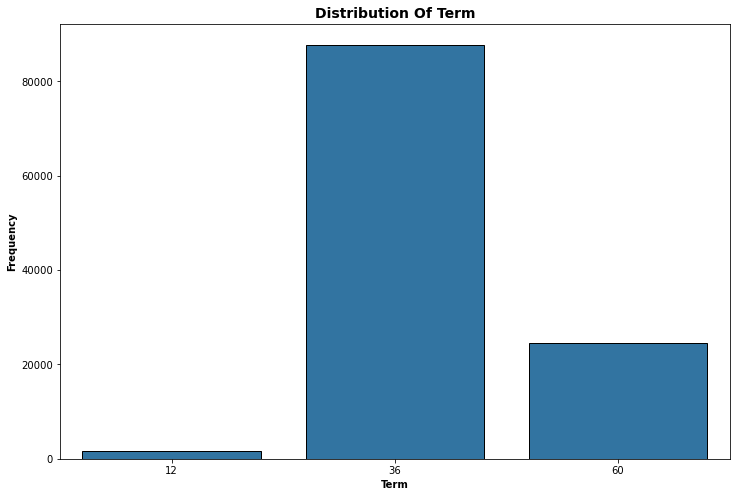

In [16]:
# us the function to plot a countplot of loan Terms. 
myCountPlot(loans_df, 'Term')

>**Observations:** The most popular loan term is 36 while the  least common is 12.

>**Question:** What is the status of most loans in the bank?

In [17]:
loans_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [18]:
# create a function for generating ordered count plots.

def myCountPlotOrder(df, yVar):
    # set plot dimensions
    plt.figure(figsize=[12,8])
    # order
    count=df[yVar].value_counts().index
    # one base color
    base_color=sns.color_palette()[0]
    # plot
    sns.catplot(data=df, y=yVar, kind='count', order=count, height=12, color = base_color)
    # Add title and format it
    plt.title(f'''Distribution of {yVar}'''.title(), fontsize=14, weight='bold')
    # Add xlabel and format it
    plt.xlabel('Frequency'.title(), fontsize=10, weight='bold')
    # Add ylabel and format it
    plt.ylabel(yVar.title(), fontsize=10, weight='bold')

<Figure size 864x576 with 0 Axes>

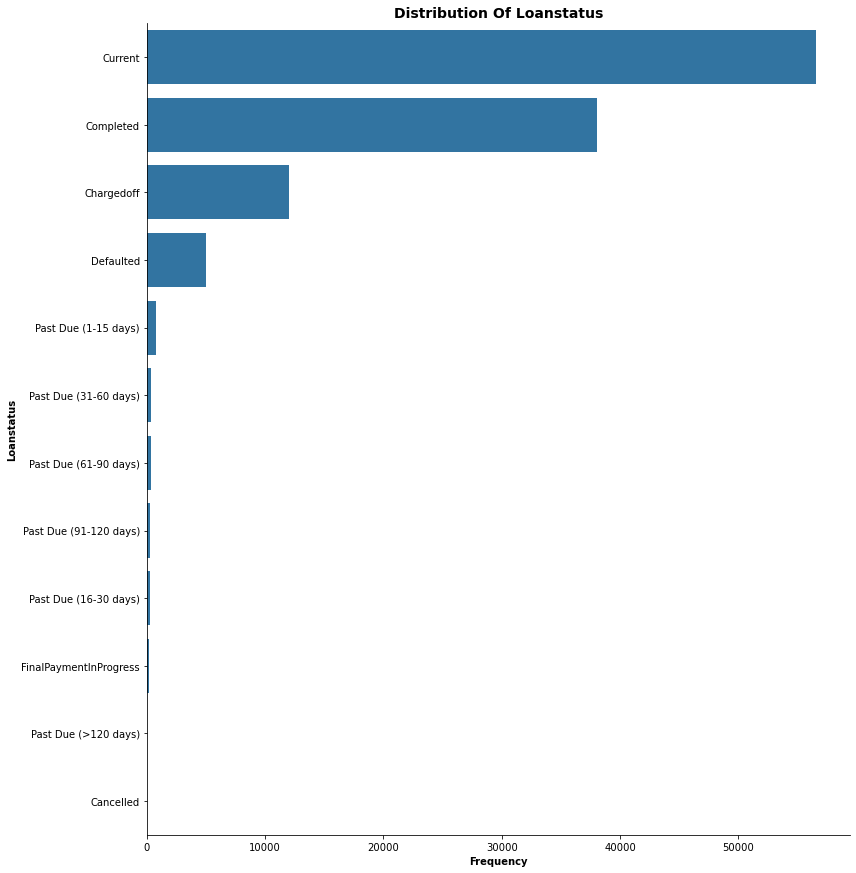

In [19]:
# use a function to plot the counts of Loan Status
myCountPlotOrder(loans_df, 'LoanStatus')

>**Observation:** From the data, most loans are active, followed by those that borrowers have completed paying, those charged off and then the defaulted ones.

In [20]:
loans_df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

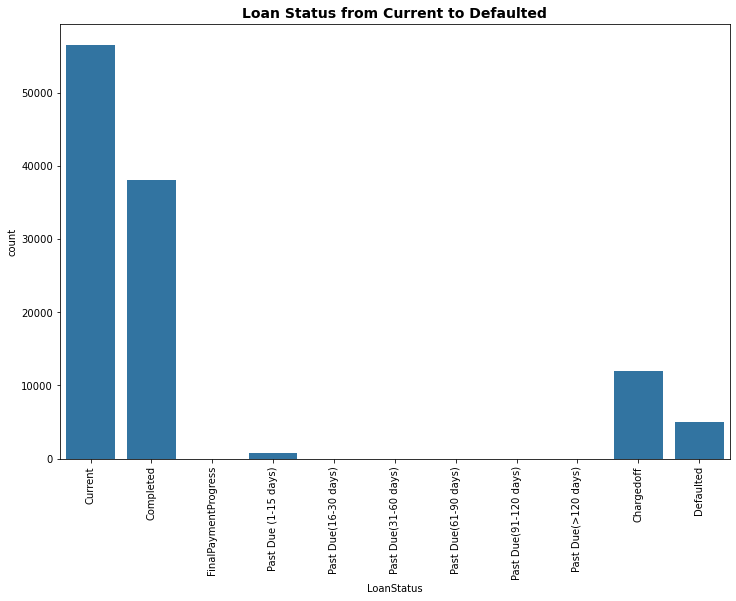

In [21]:
# Loan status is ordinal data.
count_order = ['Current', 'Completed', 'FinalPaymentProgress', 'Past Due (1-15 days)', 'Past Due(16-30 days)', 'Past Due(31-60 days)', 'Past Due(61-90 days)',
                   'Past Due(91-120 days)', 'Past Due(>120 days)', 'Chargedoff', 'Defaulted']
    
# plot size
plt.figure(figsize=[12,8])
# set base color
base_color = sns.color_palette()[0]
# plot
sns.countplot(data=loans_df, x='LoanStatus', color=base_color, order=count_order);
plt.title('Loan Status from Current to Defaulted', fontsize=14, weight='bold');
plt.xticks(rotation=90);

>**Question:** From a geographical point of view, Which States are people most likely to take prosper loans and viceversa?

In [22]:
 loans_df['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

<Figure size 864x576 with 0 Axes>

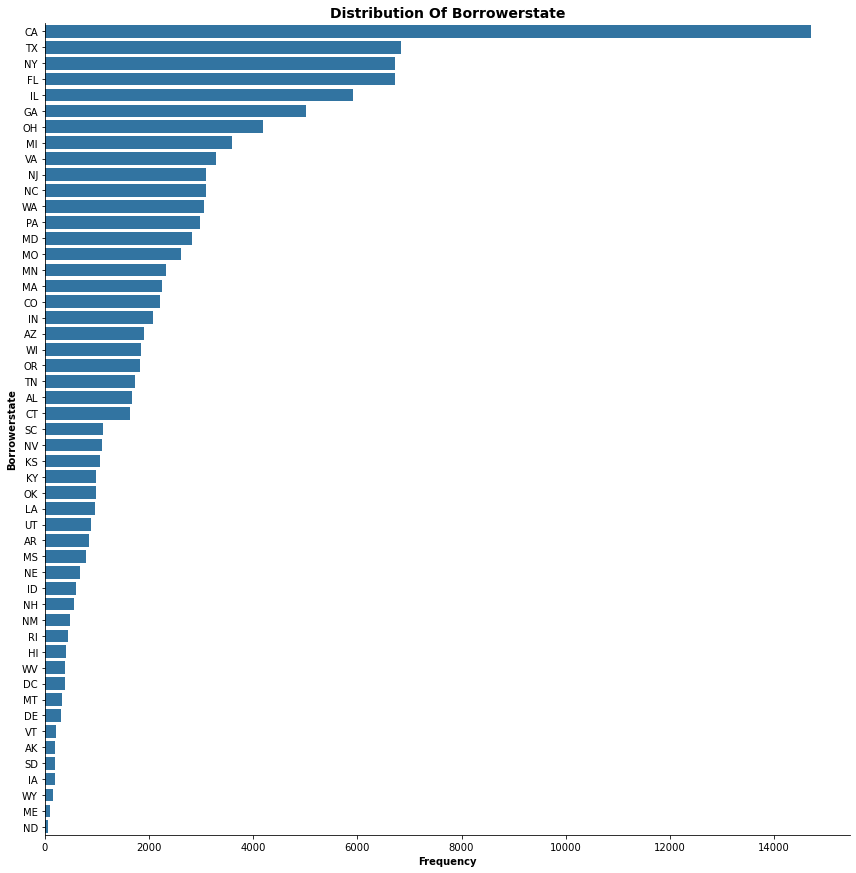

In [23]:
# use the function to plot the counts of BorrowerStates
myCountPlotOrder(loans_df, 'BorrowerState')

>**Observation:** California State has the largest number of borrowers which stands at over 14,000. North Dakota state on the contrary has the least number, 52. However, we would need population information to be able to do some feature engineering to decide states with the highest loan uptake rate. 

>**Question:** Which occupation has most professionals taking prosper loans?  

<Figure size 864x576 with 0 Axes>

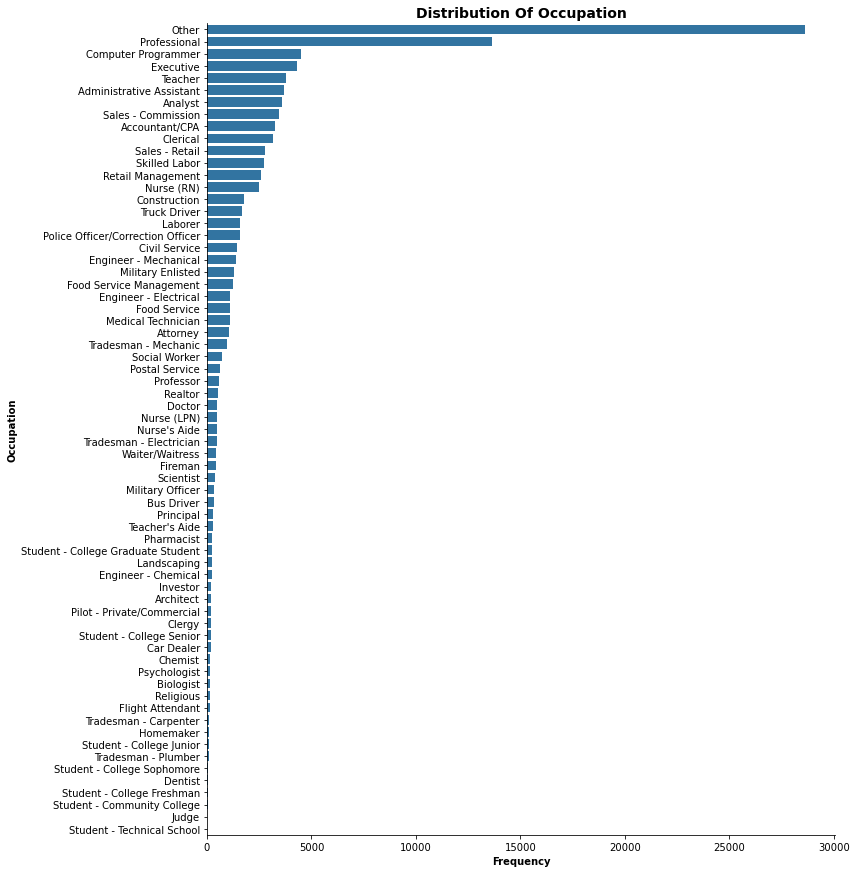

In [24]:
# use the function to plot the count of Occupation.
myCountPlotOrder(loans_df, 'Occupation');

>**Observation:** Apart from the huge chunk of *Others*, Professionals lead the pack followed by computer programmers, Executives and teachers. At the bottom of the pecking order we have mainly students. 

>**Question:** What is the distribution of the Borrower's Annual Percentage Rate (APR) for the loan.

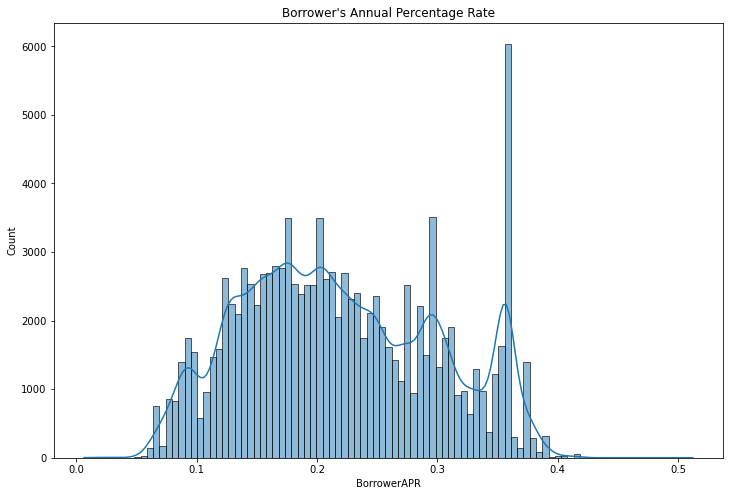

In [25]:
plt.figure(figsize=(12,8));
sns.histplot(loans_df.BorrowerAPR, kde=True);
plt.title("Borrower's Annual Percentage Rate");


>**Observation:** We see a normal distribution with a bell curve. An outlier is noticed on the curve that needs furthur investigation.

>**Question:** Show the distribution of number of investors who fund the loans.

In [26]:
loans_df['Investors'].describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

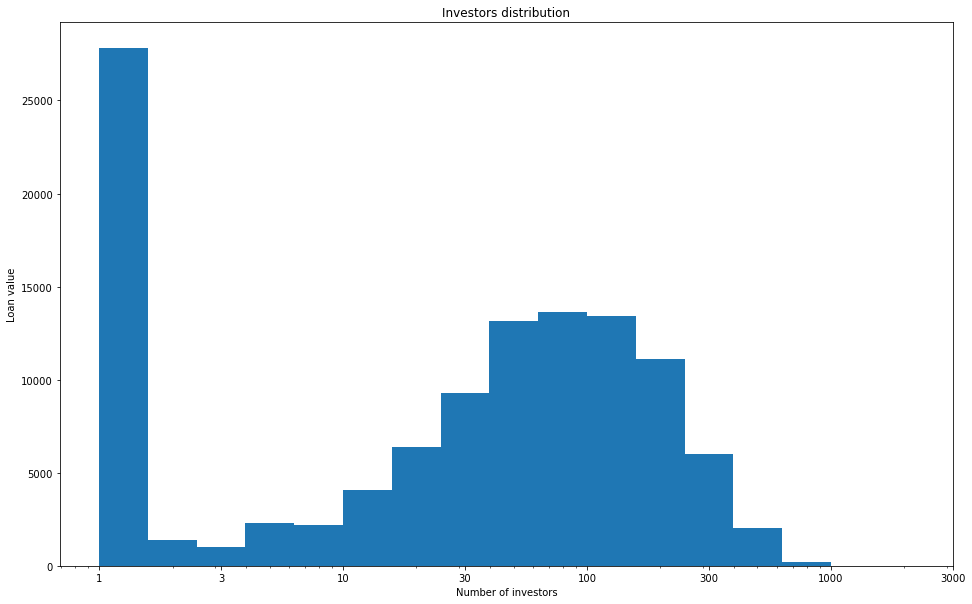

In [27]:
# figure size
plt.figure(figsize=(16,10));

# modify the bins
bins = 10**np.arange(0, np.log10(loans_df['Investors'].max())+0.2, 0.2);

# plot the histogram
plt.hist(loans_df['Investors'], bins = bins);
ticks = np.arange(0, np.log10(loans_df['Investors'].max())+0.5, 0.5);
plt.xscale('log');
labels = [1, 3, 10, 30, 100, 300, 1000, 3000]
plt.xlabel('Number of investors')
plt.ylabel("Loan value")
plt.title("Investors distribution")
plt.xticks(10**ticks, labels);

The plot shows a normal distribution in a log scale. 

>**Question:** What Percentage of borrowers have homes?

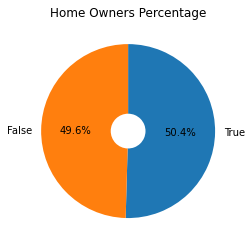

In [28]:
homes = loans_df.IsBorrowerHomeowner.value_counts()
plt.pie(homes, labels = homes.index,  autopct='%1.1f%%', startangle = 90, counterclock=False, wedgeprops = {'width' : 0.8});
plt.title('Home Owners Percentage');

>**Observation:** Borrowers are almost split into half. Both those with homes and those without are taking loans.

## Bivariate Exploration

>**Question:** What is the relationship between loan Term and BorrowerAPR

In [29]:
def myBoxPlot(df, xVar,yVar):
    # define figsize
    plt.figure(figsize=[12,8])
    # use one base color
    base_color=sns.color_palette()[0]
    # plot
    sns.boxplot(data=df, x=xVar, y=yVar, color=base_color)
    # Add title and format it
    plt.title(f'''Boxplot {yVar} : {xVar}'''.title(), fontsize=14, weight='bold')
    # Add xlabel and format it
    plt.xlabel(xVar, fontsize=10, weight='bold')
    # Add ylabel and format it
    plt.ylabel(yVar, fontsize=10, weight='bold')

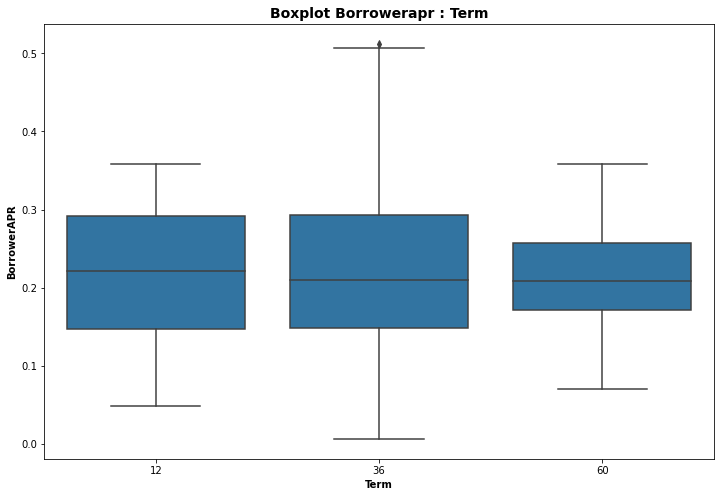

In [30]:
# plot the boxplot to show the relationship between BorrowerAPR and Term
myBoxPlot(loans_df, 'Term', 'BorrowerAPR')

>**Observation:** Loans with 36 months terms have the highest range of BorrowerAPRs, followed by 12 months loan terms and finally 60 months loans range. The medians are almost similar.

>**Question:** How does the estimated loss compare among the three loan terms?

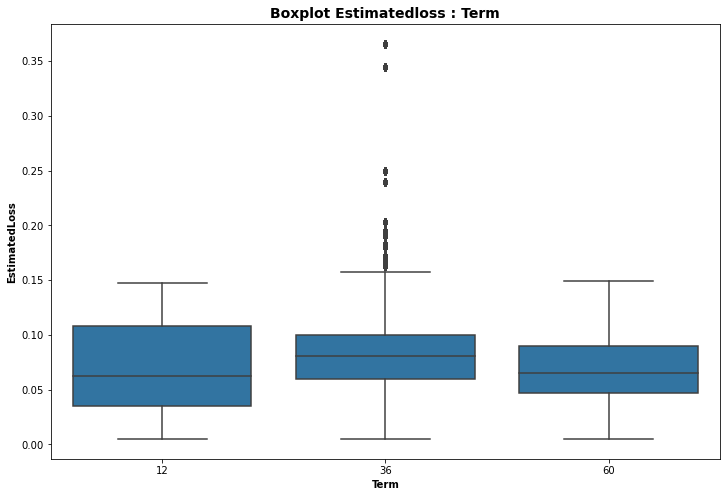

In [31]:
# plot the boxplot to show the relationship between EstimatedLoss and Term
myBoxPlot(loans_df, 'Term', 'EstimatedLoss')

>**Observation:** Estiamted Loss for loans at 12 month terms are low compared to the estimated loss for 36 month Term loans. A couple of outliers are also observed in the 36 month term.

>**Question:** Explore correlations between selected numeric columns in the loans data set.

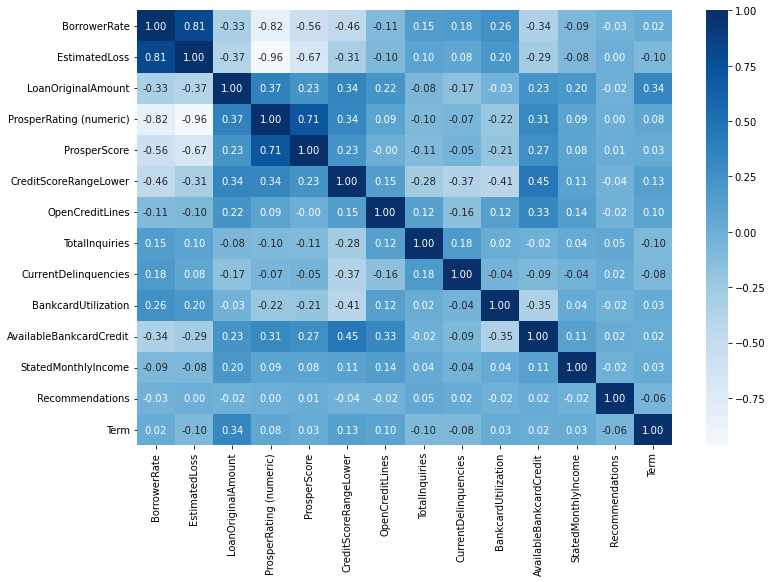

In [32]:
# select numeric columns to check for correlation.
numeric_cols = ['BorrowerRate', 'EstimatedLoss', 'LoanOriginalAmount','ProsperRating (numeric)','ProsperScore','CreditScoreRangeLower','OpenCreditLines',
                  'ListingCreationDate','TotalInquiries','CurrentDelinquencies', 'BankcardUtilization', 
                  'AvailableBankcardCredit','IncomeRange','StatedMonthlyIncome','Recommendations','Term']
# plot an annotated heat map
plt.figure(figsize=(12,8))
sns.heatmap(loans_df[numeric_cols].corr(), xticklabels=True, yticklabels=True, annot=True, fmt = '.2f', cmap = 'Blues', center=0);

>**Observation:** 
Highly correlated features:
Estimated loss & Borrower Rate.
Proper score & Prosper Rating.
There is a 0.34 correlation between loan term and Loan original amount.
The prosper rating is hihgly correlated with Borrower rate, estimated loss which indicates that the Annual percentage rate is mean to cover the estimated loss
ProsperScore is high and CreditScoreRangeLower, BankcardUtilization are medium correlated to ProsperRating.

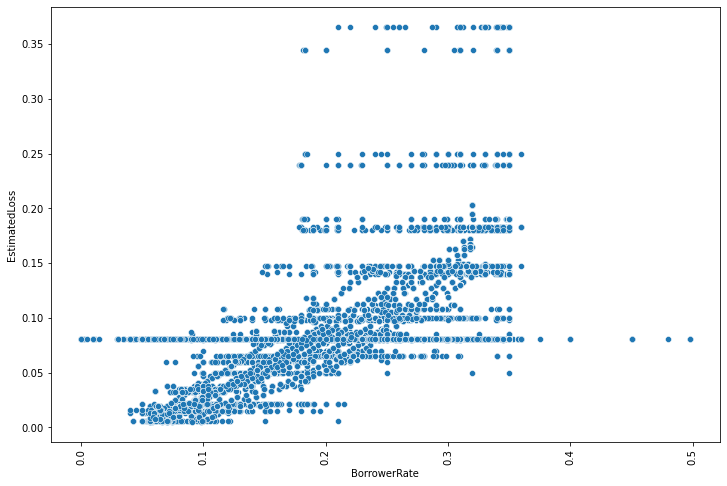

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = loans_df, x = 'BorrowerRate', y = 'EstimatedLoss', x_jitter= 0.5);
plt.xticks(rotation = 90);

for high borrowerRate, past 0.4, the estiamtedLoss is constant and does not seem to change with increase in BorrowerRate.
The greatest collection of estiamtedLoss is concentrated between borrowerRates of 0.1 and 0.3

>**Question:** Explore the relation between the Estimated Return and the Term. 

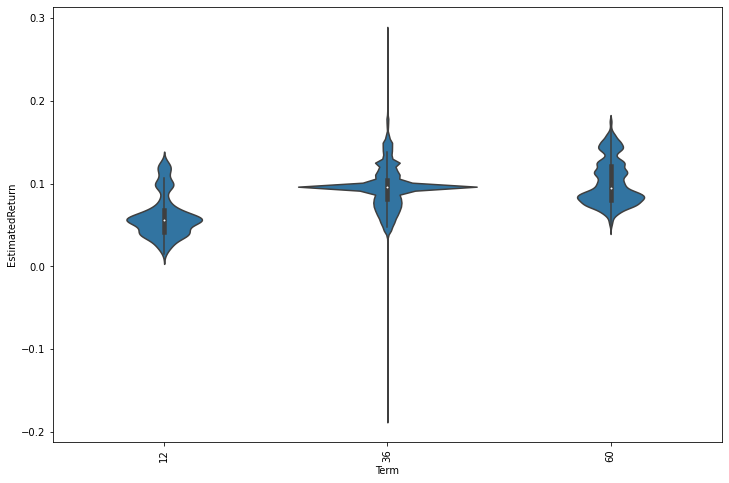

In [34]:
plt.figure(figsize=(12,8))
sns.violinplot(data = loans_df, x = 'Term', y = 'EstimatedReturn', color = base_color);
plt.xticks(rotation = 90);

>**Observation:** 36 Months terms loans have the highest EstiamtedReturns followed by 60 months term loans.

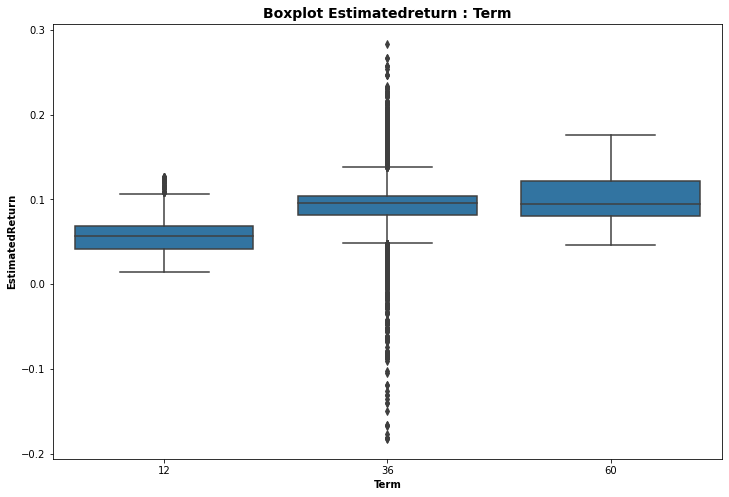

In [35]:
# Estimated return vs Term on a Boxplot
myBoxPlot(loans_df, 'Term', 'EstimatedReturn')

#### Multivariate Explorations.

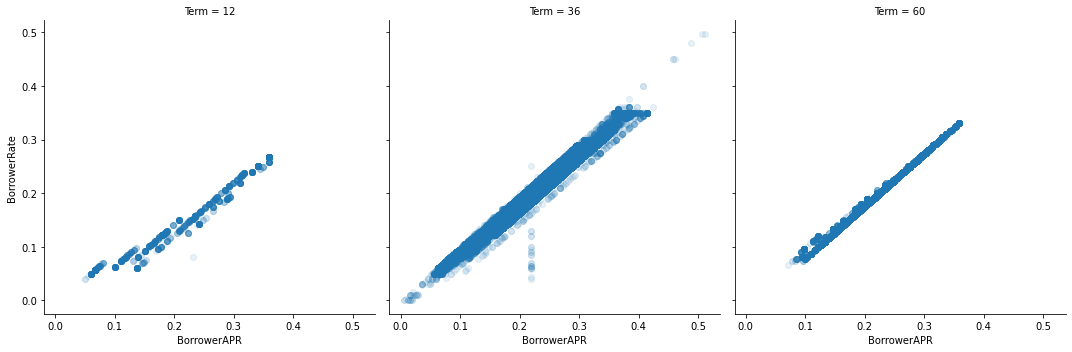

In [36]:
# BorrowerAPR, BorrowerRate vs. Term
g = sns.FacetGrid(data = loans_df, col = 'Term', height = 5, margin_titles = True)
g.map(plt.scatter, 'BorrowerAPR', 'BorrowerRate', alpha=0.1);

>**Observation:** The BorrowerRate has a positive correlation wiht the BorrowerAPR for all Loan terms, 12, 36 and 60 months.
The BorrowerRate and BorrowerAPR are mainly concentrated between 0.1 and 0.4 for 36 & 60 month term loans

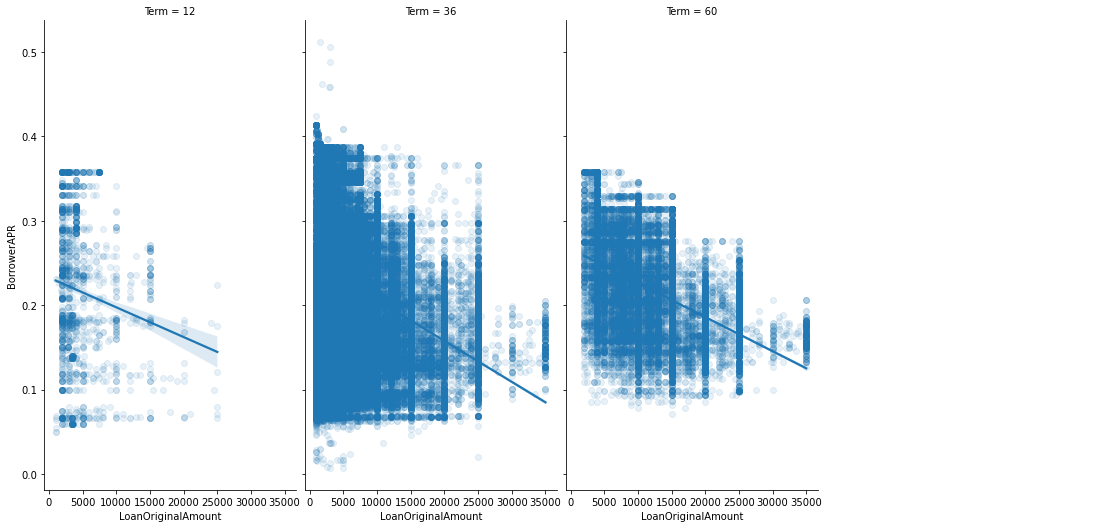

In [37]:
g=sns.FacetGrid(data=loans_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
g.fig.set_size_inches(15,8);

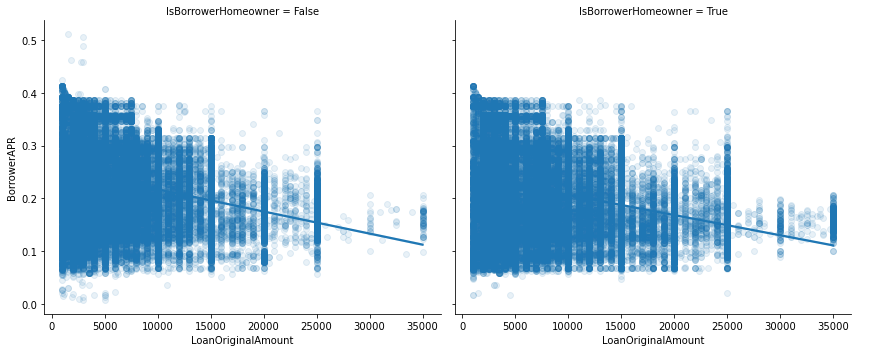

In [38]:
g = sns.FacetGrid(data=loans_df, aspect=1.2, height=5, col='IsBorrowerHomeowner')
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1})
g.add_legend();

>**Observtion:** Irrespective of term and whether borrower is a homeowner or not, the correlation between Borrower APR and Loan Original Amount is still negative.

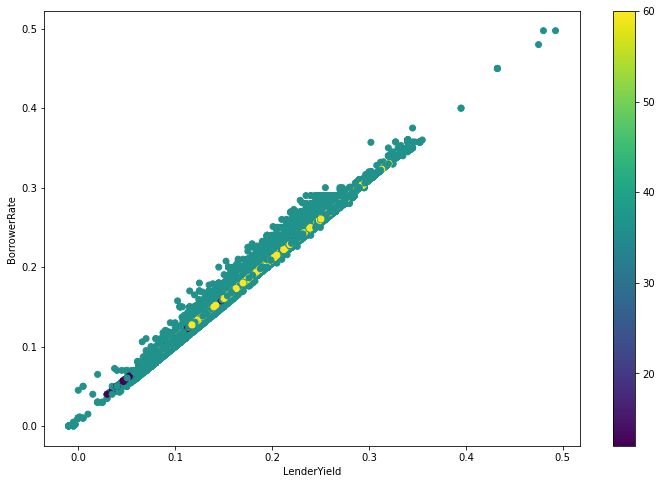

In [39]:
plt.figure(figsize=(12,8))
plt.xlabel('LenderYield')
plt.ylabel('BorrowerRate')
plt.scatter(data = loans_df, x = 'LenderYield', y = 'BorrowerRate', c = 'Term')
plt.colorbar();

>**Observation:** There is a postive correlation between Borrower Rate, Lender Yield and Term.

### Relationships observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There was a positive correlation between Borrower APR and Borrower Rate in the three terms in the data 12 months, 36 months and 60 month.In my observation, the relationship between LoanOriginalAmount, and BorrowerAPR, a negative correlation is observed between the three loan terms.There is a positive correlation between LenderYield and BorrowerRate in all terms. 

### Were there any interesting or surprising interactions between features?

> From my visualization exploration, we mainly find positve correlations between 'BorrowerAPR' & 'BorrowerRate'. Negative correlation between 'LoanOriginalAmount' and 'BorrowerAPR'

## Conclusions
> I gathered / downloaded the data programmatically from a web link. Then I assessed and cleaned the Loans data. After the data was ready, I dived into the exploration phase where I built univariate, Bivariate and Multivariate Visualizations. Some of the key findings from this data exploration are as follows: California state had the most loans. 36 months loan term was the most popular. Borrowers are almost split into half. Both those with homes and those without are taking loans.Estimated Loss for loans at 12 month terms are low compared to the estimated loss for 36 month Term loans.